# Making a graphviz digraph for the Lightsheet data processing pipeline

In [1]:
import graphviz
%matplotlib inline

## Processing only roadmap

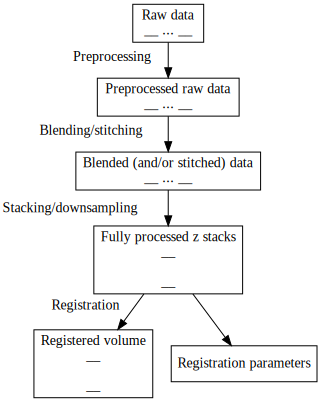

In [24]:
G = graphviz.Digraph(name='processing')
# with processing_graph.subgraph(name='cluster_subprocessing') as G:

# G.attr(nodesep="1")
G.attr('node',shape='box')
G.node('A',label='Raw data \n__ ... __',)
G.node('B',label='Preprocessed raw data \n__ ... __')
G.node('C',label='Blended (and/or stitched) data \n__ ... __')
G.node('D',label='Fully processed z stacks' + u'\n__\n\u22EE\n__')
G.node('E',label='Registered volume' + u'\n__\n\u22EE\n__')
G.node('F',label=r'Registration parameters')
G.edge('A','B',headlabel='Preprocessing',labeldistance="6",labelangle="70",)
G.edge('B','C',headlabel='Blending/stitching',labeldistance="8",labelangle="75")
G.edge('C','D',headlabel='Stacking/downsampling',labeldistance="10",labelangle="80")
G.edge('D','E',headlabel='Registration',labeldistance='4',labelangle='90')
G.edge('D','F')
G.save('processing_roadmap.gv')
G

In [161]:
G = graphviz.Digraph(name='cluster_processing')
# with processing_graph.subgraph(name='cluster_subprocessing') as G:

G.attr(nodesep="1")
G.attr('node',shape='box')
G.node('A',label='Raw data \n__ ... __',)
with G.subgraph() as s:
    s.attr(rank='same')
    s.node('E',label='Cells(x,y,z) (unregistered)')
    s.node('B',label='Preprocessed raw data \n__ ... __')
G.node('C',label='Blended (and/or stitched) data \n__ ... __')
G.node('D',label='Fully processed z stacks' + u'\n__ \n\u22EE\n __')
G.edge('A','B',headlabel='Preprocessing',labeldistance="4",labelangle="90",)
G.edge('B','C',headlabel='Blending/stitching',labeldistance="8",labelangle="70")
G.edge('C','D',headlabel='Stacking/downsampling',labeldistance="10",labelangle="75")


G.edge('A','E',headlabel='Cell detection',labeldistance="4",labelangle="-90",)
with G.subgraph() as s:
    s.attr(rank='same')
    s.node('F',label='Registered volume' + u'\n__ \n\u22EE\n __')
    s.node('G',label='Registration solution')
    s.node('H',label='Cells(x,y,z) (registered)')
G.edge({'E',,'G')
G.edge('D','F',headlabel='Registration',labeldistance='8',labelangle='75')
G.edge('E','G')
G.edge('G','H')

# G.save('cell_detection_roadmap.gv')
print(G)

AttributeError: 'set' object has no attribute 'partition'

## Cell counting roadmap

In [2]:
src = """
digraph cluster_processing {
    nodesep=1
    node [shape=box]
    A [label="Raw data 
__ ... __"]
    {
        rank=same
        E [label="Cells(x,y,z) (unregistered)"]
        B [label="Preprocessed raw data 
__ ... __"]
    }
    C [label="Blended (and/or stitched) data 
__ ... __"]
    D [label="Fully processed z stacks
__ 
⋮
 __"]
    A -> B [headlabel=Preprocessing labelangle=90 labeldistance=4]
    B -> C [headlabel="Blending/stitching" labelangle=70 labeldistance=8]
    C -> D [headlabel="Stacking/downsampling" labelangle=70 labeldistance=10]
    A -> E [headlabel="Cell detection" labelangle=-90 labeldistance=4]
    {
        rank=same
    F [label="Registered volume
__ 
⋮
 __"]
        G [shape=point,width=0.01,height=0.01]
        H [label="Cells(x,y,z) (registered)"]
    }
    {E,F} -> G [dir=none]
    D -> F [headlabel=Registration labelangle=60 labeldistance=6]
    G -> H
}

"""


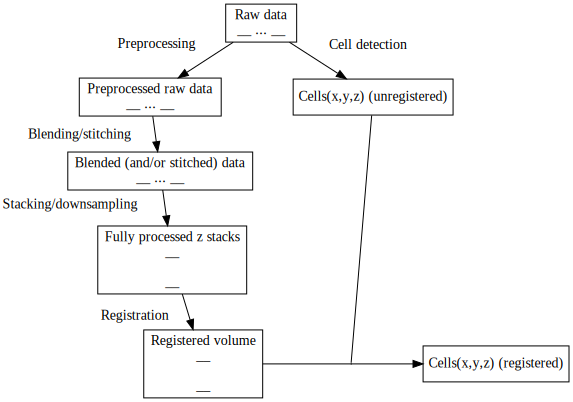

In [3]:
d=graphviz.Source(src)
d

In [179]:
d.save('cell_detection_roadmap.gv')

'cell_detection_roadmap.gv'